In [1]:
import tensorflow as tf
tf.__version__



'2.20.0'

# Clasificación de Prendas de Ropa con Fashion-MNIST 👕👖

Este proyecto entrena una red neuronal convolucional (CNN) usando TensorFlow/Keras para clasificar imágenes del dataset Fashion-MNIST.

## Objetivos
- Cargar y explorar el dataset Fashion-MNIST.
- Preprocesar las imágenes.
- Construir y entrenar una CNN.
- Evaluar el modelo.
- Visualizar predicciones.


## 1. Carga del dataset
Fashion-MNIST contiene 70,000 imágenes en escala de grises (28x28) divididas en 10 clases de ropa.


In [12]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

np.random.seed(42)
tf.random.set_seed(42)



In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

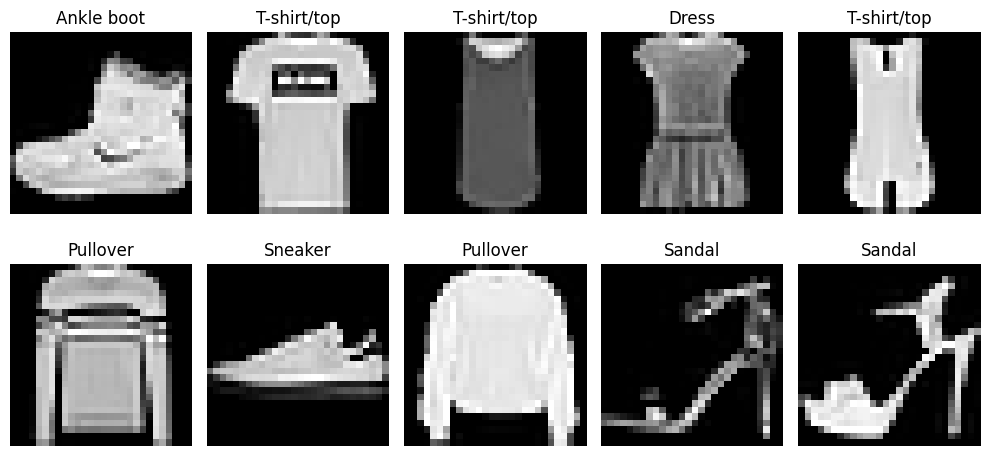

In [4]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()


## 2. Preprocesamiento
- Normalizar píxeles a [0,1]
- Expandir dimensión para CNN (28,28,1)


In [13]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

x_train.shape, x_test.shape


((60000, 28, 28, 1, 1), (10000, 28, 28, 1, 1))

In [6]:
from sklearn.model_selection import train_test_split

x_train_full, x_val, y_train_full, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

x_train_full.shape, x_val.shape


((54000, 28, 28, 1), (6000, 28, 28, 1))

## 3. Construcción del modelo (CNN)


In [17]:
def build_model(input_shape=(28,28,1), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation="relu", input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(64, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ])
    
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

model = build_model()
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Entrenamiento del modelo


In [8]:
history = model.fit(
    x_train_full, y_train_full,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=64,
    verbose=2
)


Epoch 1/10
844/844 - 15s - 18ms/step - accuracy: 0.7735 - loss: 0.6211 - val_accuracy: 0.8635 - val_loss: 0.3806
Epoch 2/10
844/844 - 22s - 26ms/step - accuracy: 0.8537 - loss: 0.4121 - val_accuracy: 0.8768 - val_loss: 0.3400
Epoch 3/10
844/844 - 14s - 17ms/step - accuracy: 0.8728 - loss: 0.3592 - val_accuracy: 0.8863 - val_loss: 0.3192
Epoch 4/10
844/844 - 16s - 19ms/step - accuracy: 0.8840 - loss: 0.3246 - val_accuracy: 0.8913 - val_loss: 0.2943
Epoch 5/10
844/844 - 19s - 23ms/step - accuracy: 0.8912 - loss: 0.3012 - val_accuracy: 0.8950 - val_loss: 0.2837
Epoch 6/10
844/844 - 22s - 26ms/step - accuracy: 0.8967 - loss: 0.2820 - val_accuracy: 0.8967 - val_loss: 0.2786
Epoch 7/10
844/844 - 20s - 23ms/step - accuracy: 0.9019 - loss: 0.2657 - val_accuracy: 0.8983 - val_loss: 0.2720
Epoch 8/10
844/844 - 13s - 15ms/step - accuracy: 0.9085 - loss: 0.2476 - val_accuracy: 0.9067 - val_loss: 0.2573
Epoch 9/10
844/844 - 23s - 28ms/step - accuracy: 0.9118 - loss: 0.2363 - val_accuracy: 0.9068 - 

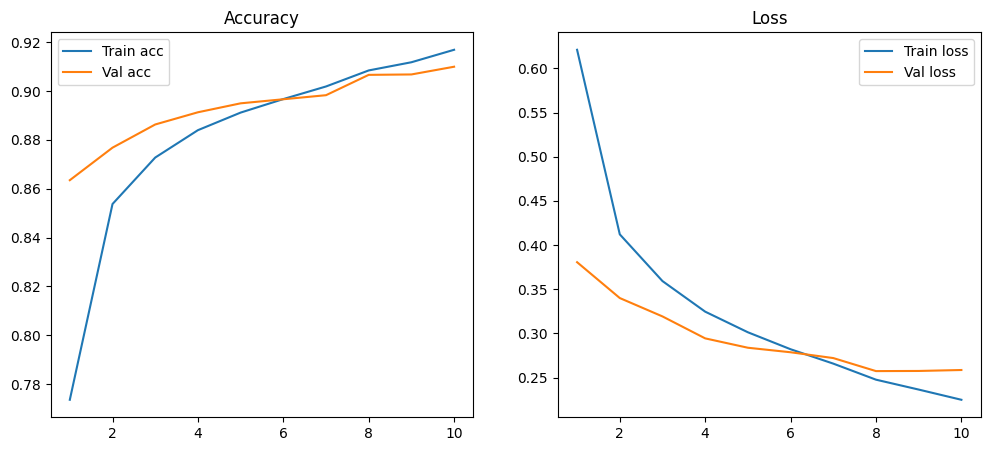

In [9]:
def plot_history(hist):
    acc = hist.history["accuracy"]
    val_acc = hist.history["val_accuracy"]
    loss = hist.history["loss"]
    val_loss = hist.history["val_loss"]
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(epochs_range, acc, label="Train acc")
    plt.plot(epochs_range, val_acc, label="Val acc")
    plt.legend()
    plt.title("Accuracy")

    plt.subplot(1,2,2)
    plt.plot(epochs_range, loss, label="Train loss")
    plt.plot(epochs_range, val_loss, label="Val loss")
    plt.legend()
    plt.title("Loss")

    plt.show()

plot_history(history)


## 5. Evaluación del modelo


In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy en test: {test_acc:.4f}")


Accuracy en test: 0.0942


## 6. Predicciones de ejemplo


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


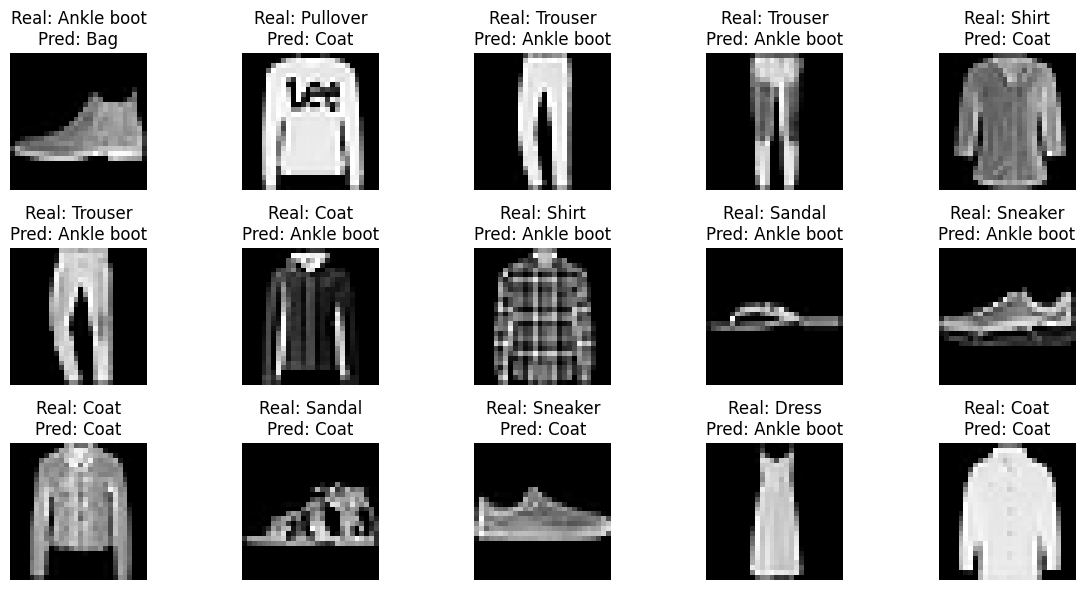

In [16]:
num_examples = 15
x_sample = x_test[:num_examples]
y_sample = y_test[:num_examples]

y_pred = np.argmax(model.predict(x_sample), axis=1)

plt.figure(figsize=(12,6))
for i in range(num_examples):
    plt.subplot(3,5,i+1)
    plt.imshow(x_sample[i].reshape(28,28), cmap="gray")
    plt.title(f"Real: {class_names[y_sample[i]]}\nPred: {class_names[y_pred[i]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


## 7. Conclusiones
- La CNN logra clasificar ropa con alta precisión.
- Se puede mejorar usando más capas o data augmentation.



In [18]:
x_test.shape, y_test.shape


((10000, 28, 28, 1, 1), (10000,))

In [19]:
# Arreglar dimensiones extra
x_train = np.squeeze(x_train)
x_test = np.squeeze(x_test)

# Volver a expandir solo una dimensión de canal
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

x_train.shape, x_test.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [20]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=64,
    verbose=2
)


Epoch 1/10
938/938 - 17s - 18ms/step - accuracy: 0.5207 - loss: 1.3070 - val_accuracy: 0.4975 - val_loss: 18.1034
Epoch 2/10
938/938 - 16s - 17ms/step - accuracy: 0.7066 - loss: 0.7953 - val_accuracy: 0.5295 - val_loss: 16.6626
Epoch 3/10
938/938 - 17s - 18ms/step - accuracy: 0.7255 - loss: 0.7395 - val_accuracy: 0.5187 - val_loss: 17.2746
Epoch 4/10
938/938 - 21s - 22ms/step - accuracy: 0.7373 - loss: 0.7089 - val_accuracy: 0.5387 - val_loss: 15.3280
Epoch 5/10
938/938 - 20s - 21ms/step - accuracy: 0.7456 - loss: 0.6839 - val_accuracy: 0.5035 - val_loss: 16.5139
Epoch 6/10
938/938 - 20s - 22ms/step - accuracy: 0.7535 - loss: 0.6612 - val_accuracy: 0.5423 - val_loss: 14.8153
Epoch 7/10
938/938 - 12s - 12ms/step - accuracy: 0.7620 - loss: 0.6386 - val_accuracy: 0.4305 - val_loss: 23.9124
Epoch 8/10
938/938 - 21s - 22ms/step - accuracy: 0.7699 - loss: 0.6230 - val_accuracy: 0.3853 - val_loss: 32.9015
Epoch 9/10
938/938 - 24s - 25ms/step - accuracy: 0.7766 - loss: 0.6054 - val_accuracy: 0

In [22]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Expandir dimensiones
x_train_full = np.expand_dims(x_train_full, -1)
x_test = np.expand_dims(x_test, -1)

# Dividir validación correctamente
x_val = x_train_full[:6000]
y_val = y_train_full[:6000]

x_train = x_train_full[6000:]
y_train = y_train_full[6000:]


In [23]:
x_train.shape, x_val.shape, x_test.shape



((54000, 28, 28, 1), (6000, 28, 28, 1), (10000, 28, 28, 1))

In [24]:
model = build_model()

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=64,
    verbose=2
)


Epoch 1/10
844/844 - 21s - 25ms/step - accuracy: 0.7777 - loss: 0.6124 - val_accuracy: 0.8647 - val_loss: 0.3766
Epoch 2/10
844/844 - 24s - 29ms/step - accuracy: 0.8549 - loss: 0.4010 - val_accuracy: 0.8857 - val_loss: 0.3153
Epoch 3/10
844/844 - 40s - 47ms/step - accuracy: 0.8767 - loss: 0.3457 - val_accuracy: 0.9003 - val_loss: 0.2754
Epoch 4/10
844/844 - 40s - 48ms/step - accuracy: 0.8854 - loss: 0.3137 - val_accuracy: 0.9082 - val_loss: 0.2522
Epoch 5/10
844/844 - 20s - 23ms/step - accuracy: 0.8959 - loss: 0.2889 - val_accuracy: 0.9135 - val_loss: 0.2429
Epoch 6/10
844/844 - 23s - 27ms/step - accuracy: 0.9027 - loss: 0.2695 - val_accuracy: 0.9177 - val_loss: 0.2363
Epoch 7/10
844/844 - 18s - 22ms/step - accuracy: 0.9088 - loss: 0.2507 - val_accuracy: 0.9162 - val_loss: 0.2321
Epoch 8/10
844/844 - 24s - 28ms/step - accuracy: 0.9141 - loss: 0.2365 - val_accuracy: 0.9155 - val_loss: 0.2340
Epoch 9/10
844/844 - 23s - 27ms/step - accuracy: 0.9187 - loss: 0.2240 - val_accuracy: 0.9160 - 

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy en test:", test_acc)


Accuracy en test: 0.9036999940872192


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


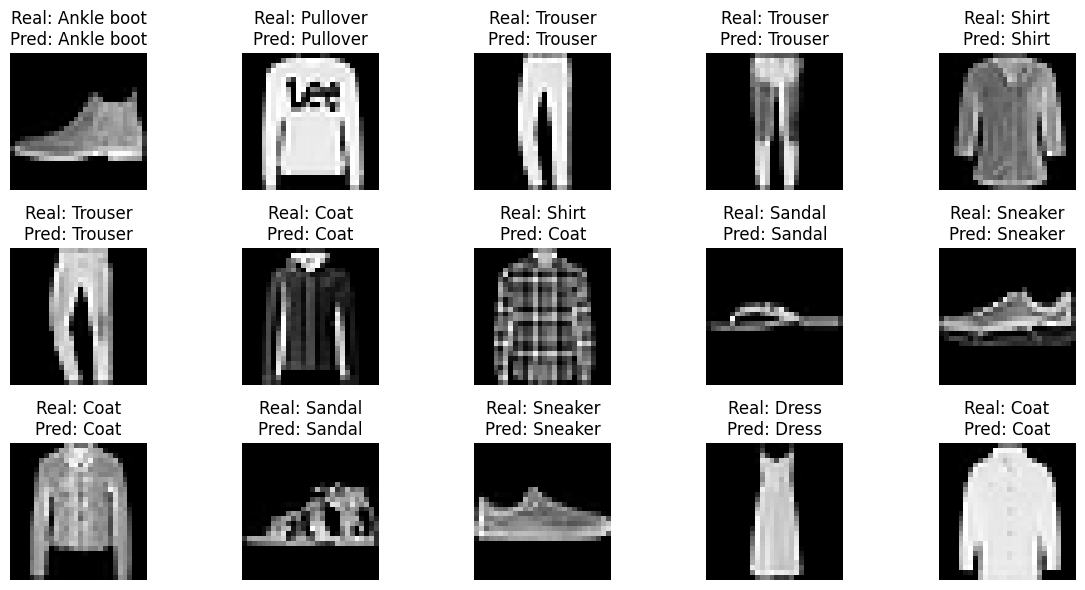

In [26]:
num_examples = 15
x_sample = x_test[:num_examples]
y_sample = y_test[:num_examples]

y_pred = np.argmax(model.predict(x_sample), axis=1)

plt.figure(figsize=(12,6))
for i in range(num_examples):
    plt.subplot(3,5,i+1)
    plt.imshow(x_sample[i].reshape(28,28), cmap="gray")
    plt.title(f"Real: {class_names[y_sample[i]]}\nPred: {class_names[y_pred[i]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()
